# Linear Regression from scratch

## Introduction

Linear Regression aims to predict continuous values by fitting a slope between the values, it fits an equation of y = mx + b  where y is the dependent variable and x is the independent variable.

There can also be multivariate regression where we predict a single output of continuous value using multiple independent variables. y = m1x1 + m2x2 + m3x3+ m4x4... + mNxN + b

however it assumes that the relationship between the variables is linear

## Simple regression

uses traditional slope intercept format, y = mx + c, where m and c are the parameters that our algorithm will try to "learn" to produce the most accurate predictions. x will represent our independent variable , our input while y will represent the dependent variable, our output

In [5]:
import numpy as np
import pandas as pd

data_penguin = pd.read_csv('Penguin/penguins_size.csv')
data_penguin.head(5)

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

Lets let our x be flipper_length_mm and our y be body_mass_g, so we will be trying ot predict values of body mass based on flipper length

before that, we have to remove the rows with NaN values

In [12]:
# remove rows with NaN values
data_subset = data_penguin[['flipper_length_mm', 'body_mass_g']]
data_clean = data_subset.dropna(subset = ['flipper_length_mm', 'body_mass_g'])
print(data_clean.head(5))
print("\n")
print(len(data_clean))

   flipper_length_mm  body_mass_g
0              181.0       3750.0
1              186.0       3800.0
2              195.0       3250.0
4              193.0       3450.0
5              190.0       3650.0


342


In [38]:
x = data_clean['flipper_length_mm']
y = data_clean['body_mass_g']
#intialize weights and bias to 0 first. It can be any value
m = 0 #weight
c = 0 #bias

In [39]:
def linear_reg(x, m, c):
    return m*x + c
y_predict = linear_reg(x, m ,c)
print(y)
print(y_predict)


0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 342, dtype: float64
0      0.0
1      0.0
2      0.0
4      0.0
5      0.0
      ... 
338    0.0
340    0.0
341    0.0
342    0.0
343    0.0
Name: flipper_length_mm, Length: 342, dtype: float64


# we can plot the graph to visualise it

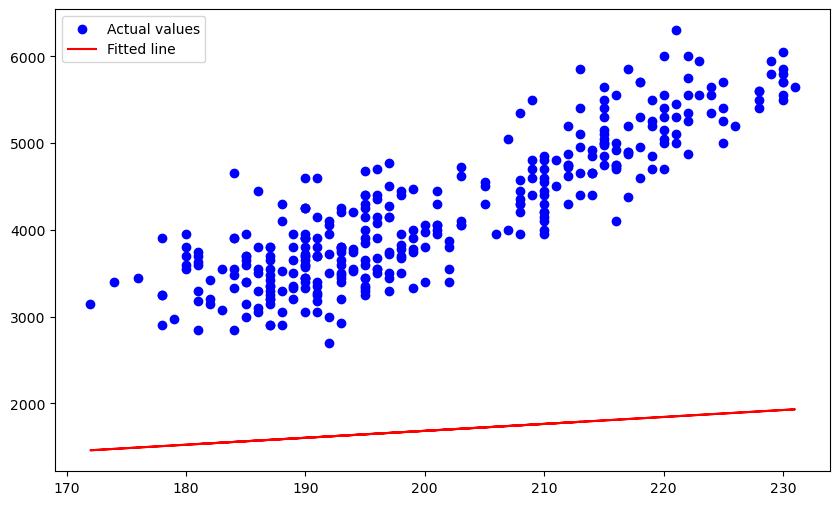

In [53]:
import matplotlib.pyplot as plt
# set the figure size
plt.figure(figsize = (10, 6))

#plotting the actual data points
plt.scatter(x, y, color = 'blue', label = 'Actual values')

#plotting the predict values
plt.plot(x, y_predict, color = 'red', label = 'Fitted line')
plt.legend()
plt.show()

Iteration 1: Weight = 33, Bias = 83


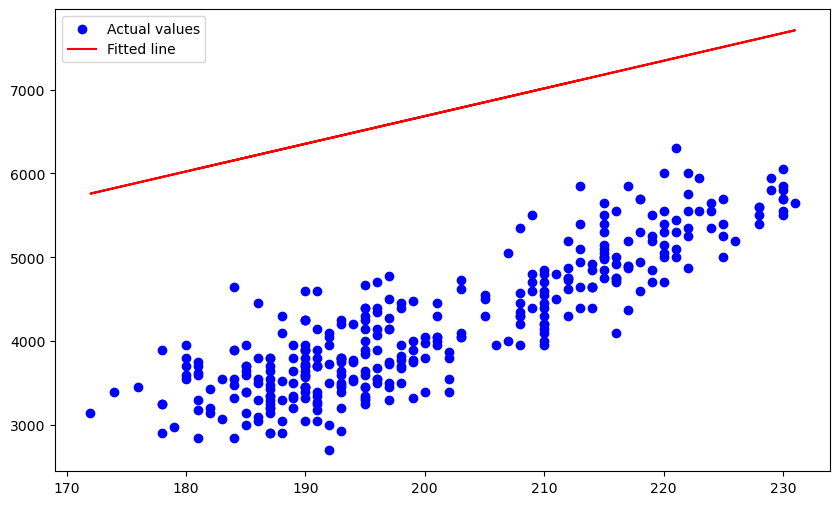

Iteration 2: Weight = 69, Bias = 35


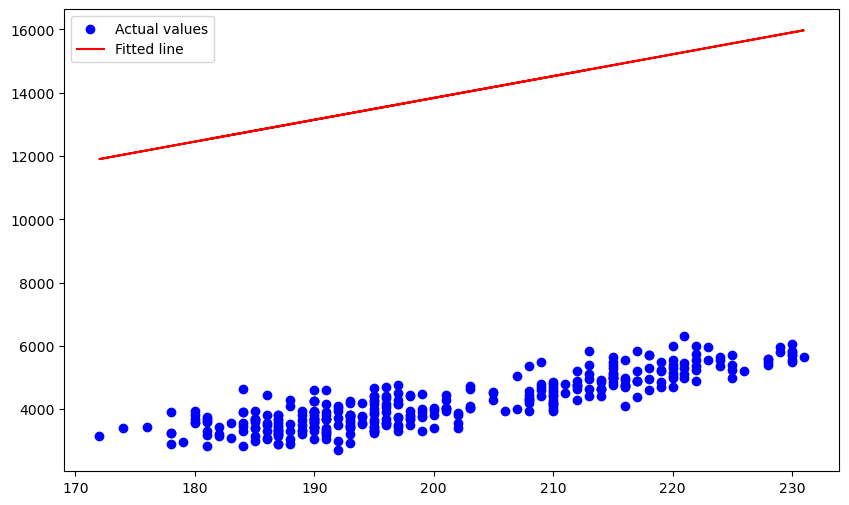

Iteration 3: Weight = 41, Bias = 16


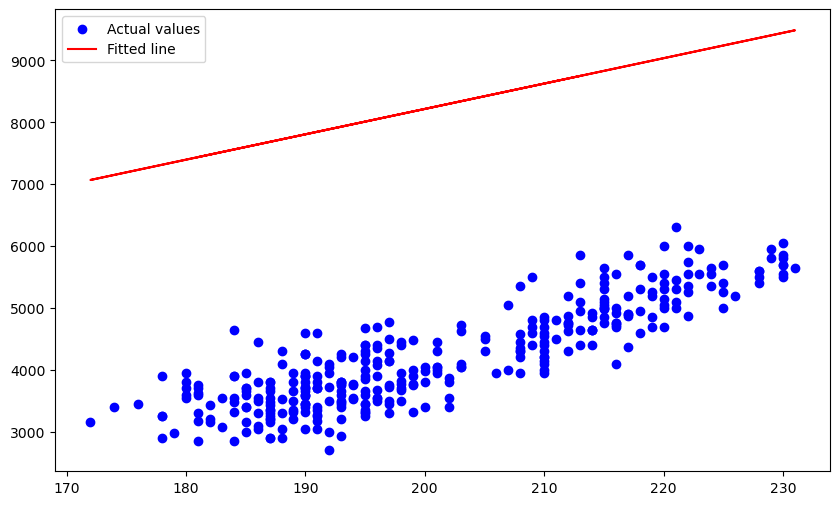

Iteration 4: Weight = 11, Bias = 4


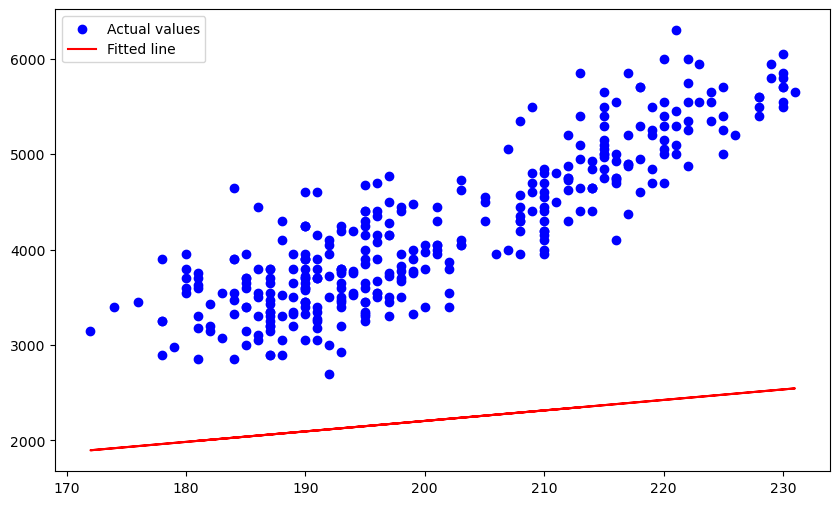

Iteration 5: Weight = 35, Bias = 28


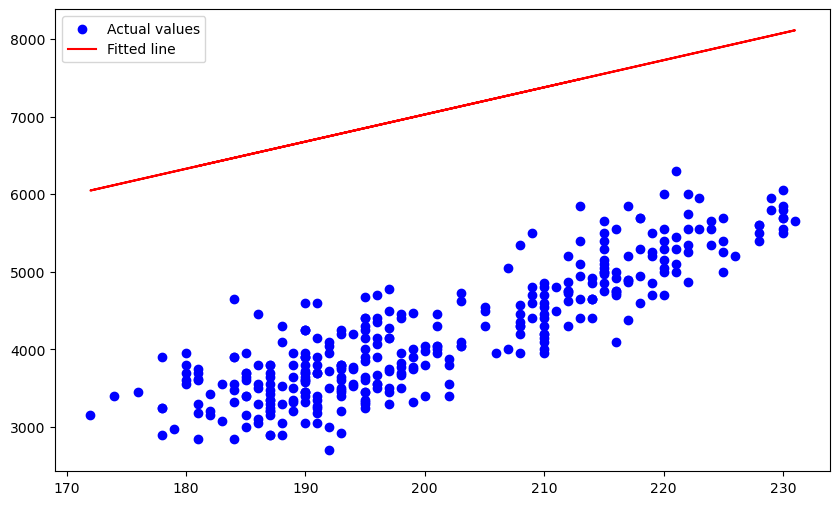

In [55]:
import random
import matplotlib.pyplot as plt

for i in range(5):
    # Generate a random integer for weight and bias
    m = random.randint(1, 100)  # Will give you a number from 1 to 100
    c = random.randint(1, 100)  # Will give you a number from 1 to 100
    print(f"Iteration {i+1}: Weight = {m}, Bias = {c}")
    
    y_predict = linear_reg(x, m, c)
    
    # Set the figure size
    plt.figure(figsize=(10, 6))
    
    # Plotting the actual data points
    plt.scatter(x, y, color='blue', label='Actual values')
    
    # Plotting the predicted values
    plt.plot(x, y_predict, color='red', label='Fitted line')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()



# so how can we write an algorithm to adjust the line such that it fits nicely in the data 

# Cost function

We need a cost function so as to optimize our weights. We can use MSE (L2) as our cost function. MSE measures the average squared error difference of the predicted and actual values. 

Our goal later is to minimize this MSE so as to improve the accuracy of our model

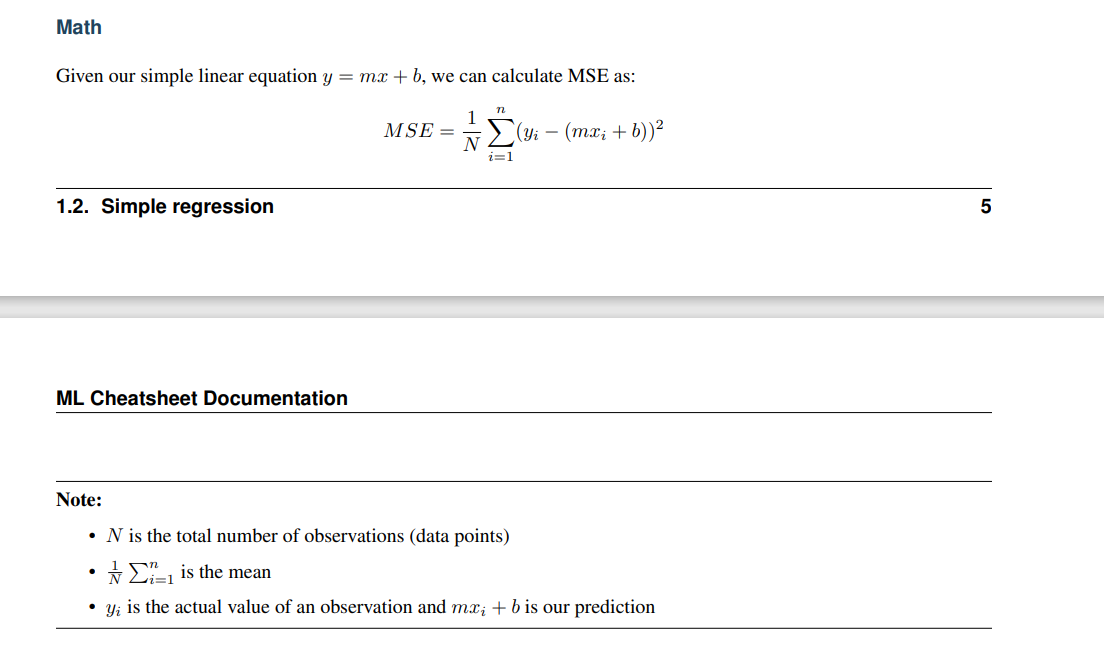

In [61]:
def cost_function(x, y, m, c):
    n = len(x)
    total_error = 0
    
    for i in range(n):
        total_error += ( y.iloc[i] - (m*x.iloc[i] + c) )**2
        
    return total_error / n

Iteration 1: Weight = 68, Bias = 3


MSE = 89778120.0116959


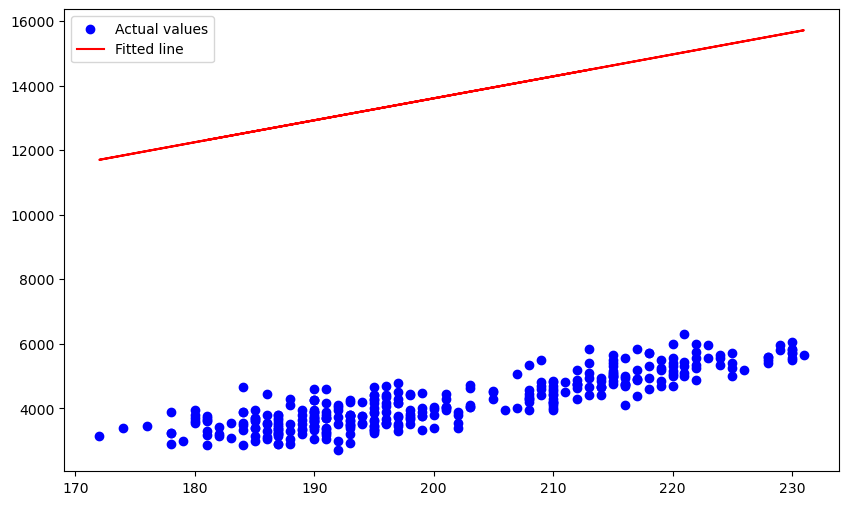

Iteration 2: Weight = 85, Bias = 4


MSE = 166295797.4766082


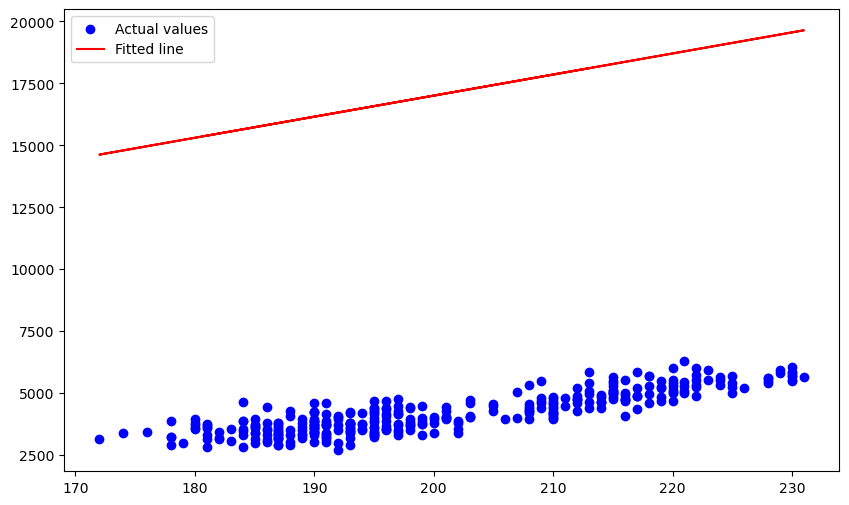

Iteration 3: Weight = 58, Bias = 66


MSE = 56678387.900584795


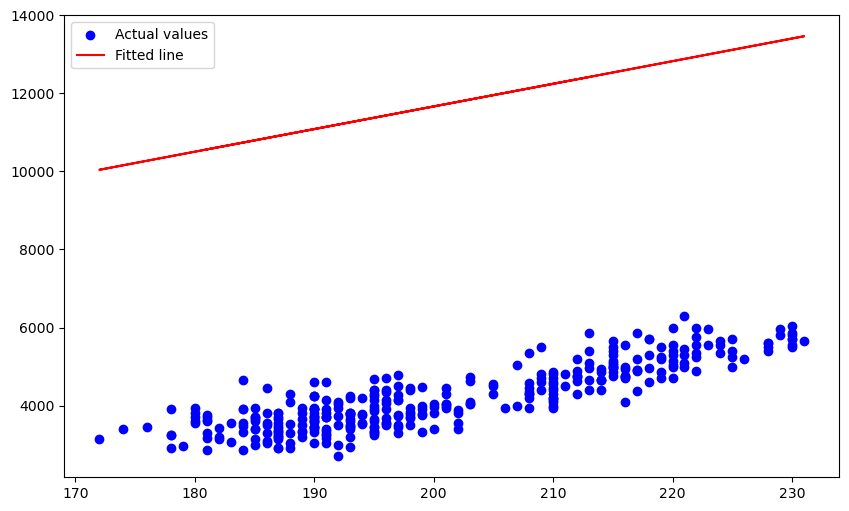

Iteration 4: Weight = 35, Bias = 45


MSE = 8464287.792397661


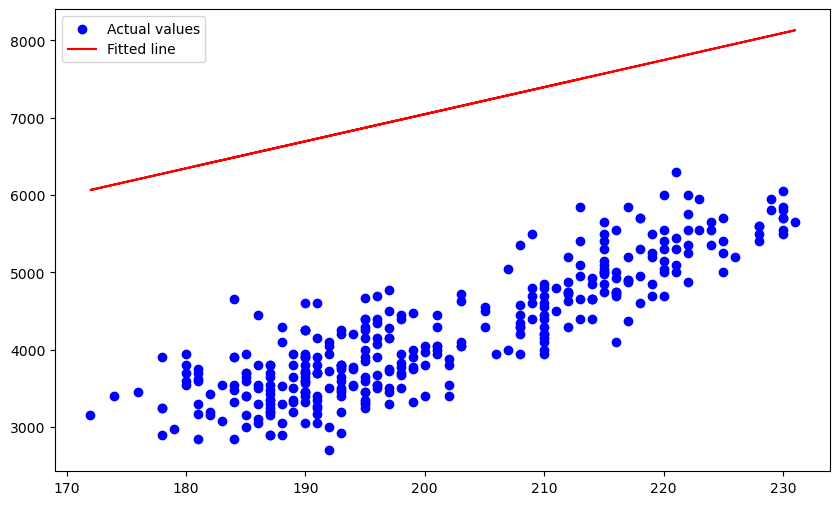

Iteration 5: Weight = 84, Bias = 100


MSE = 163590453.44444445


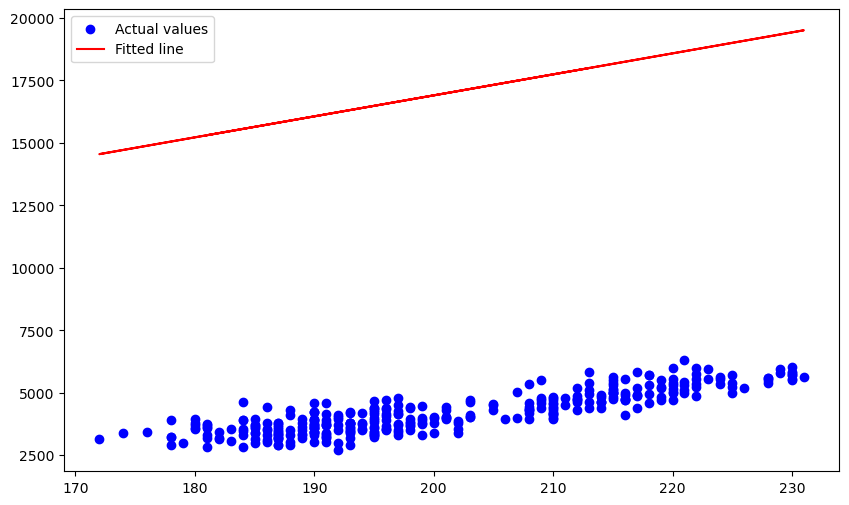

In [63]:
for i in range(5):
    # Generate a random integer for weight and bias
    m = random.randint(1, 100)  # Will give you a number from 1 to 100
    c = random.randint(1, 100)  # Will give you a number from 1 to 100
    print(f"Iteration {i+1}: Weight = {m}, Bias = {c}")
    print("\n")
    print(f"MSE = {cost_function(x, y, m, c)}")
    
    y_predict = linear_reg(x, m, c)
    
    # Set the figure size
    plt.figure(figsize=(10, 6))
    
    # Plotting the actual data points
    plt.scatter(x, y, color='blue', label='Actual values')
    
    # Plotting the predicted values
    plt.plot(x, y_predict, color='red', label='Fitted line')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()
    
    


## To minimize MSE, we can use gradient descent

# Gradient descent

Gradient descent is an optimization algorithm used to minimize the error of a model by iteratively adjusting its parameters. 
The process begins by evaluating the error obtained from the current set of weights. 
We then calculate the gradient, which is the slope of the cost function at the current point. The gradient points in the direction of the steepest increase in the error. 
To reduce the error, we update the parameters by moving them in the opposite direction of this gradient. This step is repeated until the parameters converge to a point where the cost (or error) is as low as possible, indicating that the model's predictions are as accurate as possible with respect to the given data.

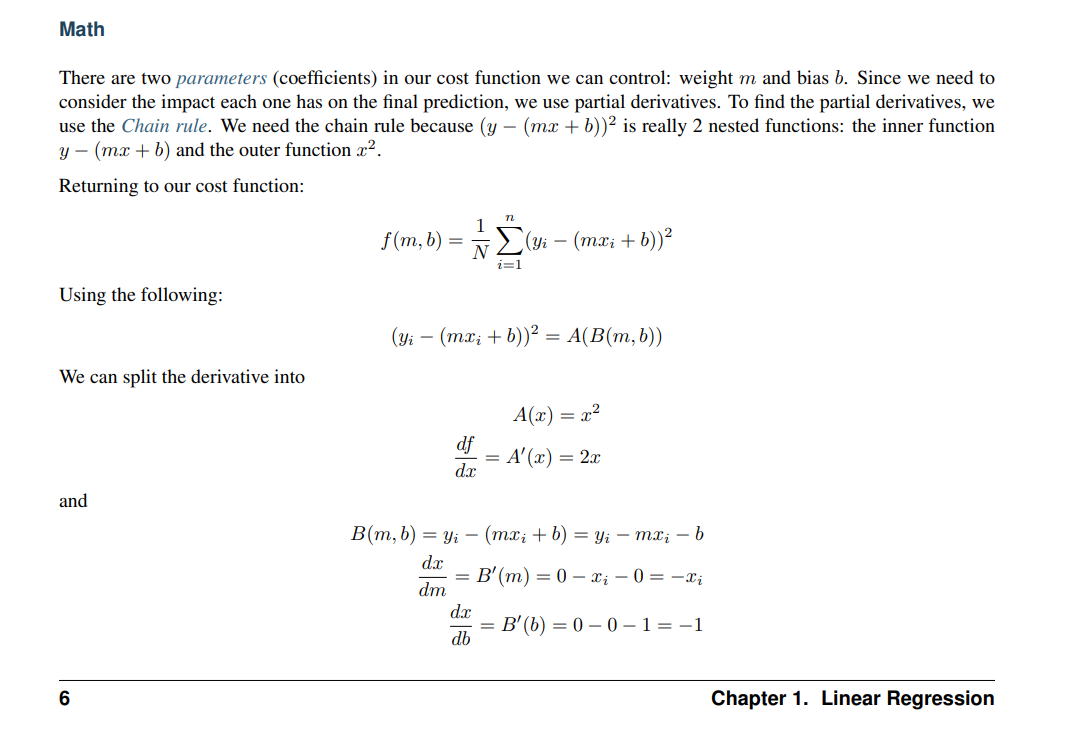
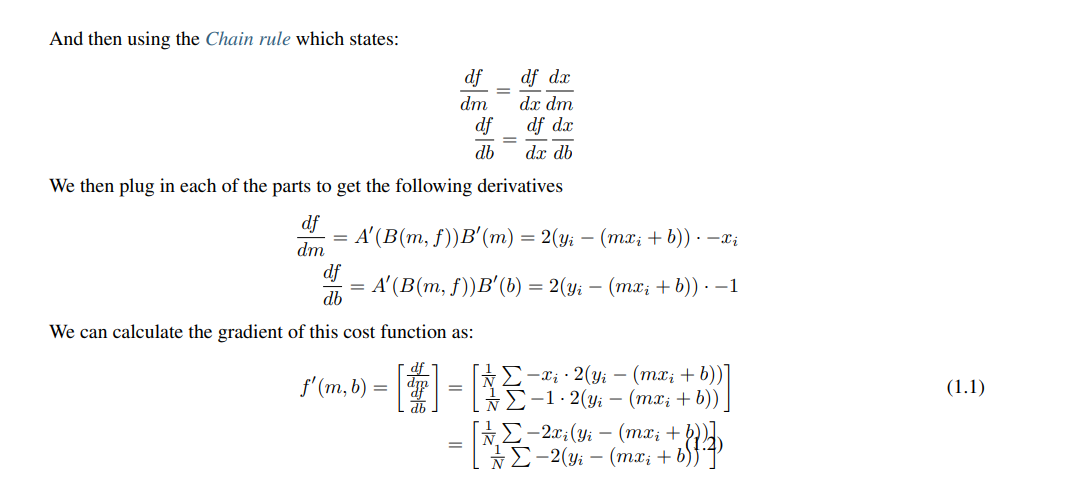

# therefore our final formula is 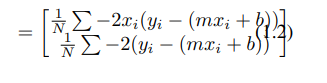

now lets write the function for gradient descent

In [70]:
def update_weights(x, y, m, c, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    n = len(x) #total number of penguins
    
    for i in range(n):
        #Calculate partial derivatives
        
        # -2x(y - (mx + c))
        weight_deriv += -2*x.iloc[i]*( y.iloc[i] - (m*x.iloc[i] + c) )
        
        # -2(y - (mx + c))
        bias_deriv += -2*( y.iloc[i] - (m*x.iloc[i] + c) )
        
    #We subtract because the derivates point in the direction of the steepest ascent
    m -= (weight_deriv / n) * learning_rate
    c -= (bias_deriv / n) * learning_rate
    
    return m,c
        

## now lets train our model

# Training

training your model is the process of iteratively improving your prediction equation by looping through the dataset multiple times, each time updating the weight and bias values in the direction indicated by the slope of the cost function (gradient). Training is complete when we reach an acceptable error threshold, or when subsequent training iterations fail to reduce our cost.

Before training we need to initialize our weights (set default values), set our hyperparameters (learning rate and number of iterations), and prepare to log our progress over each iteration

In [73]:
def train(x, y, m, c, learning_rate, iters):
    cost_history = []
    
    for i in range(iters):
        m, c = update_weights(x, y, m, c, learning_rate)
        
        #Calculate cost for auditing purposes
        cost = cost_function(x, y, m, c)
        cost_history.append(cost)
        
        #Log progress
        if i%10 == 0:
            print("iter = {:d}    weight = {:.2f}    bias = {:.4f}    cost = {:.2f}".format(i, m, c, cost))
            print("\n")
            
    return m, c, cost_history
        

if our model is working, our cost should reduce over the iterations 

In [83]:
# intialize our hyperparameters first
m = 0
c = 0
learning_rate = 0.001
iters = 50

#test out
train(x, y, m, c, learning_rate, iters)


iter = 0    weight = 1707.98    bias = 8.4035    cost = 115440685374.03


iter = 10    weight = 18410104083138295627776.00    bias = 91185869430034317312.0000    cost = 13749134257289582526526883261481422644933929467904.00


iter = 20    weight = 200916252091422017350187939295962272366592.00    bias = 995145005527702723082101702842604584960.0000    cost = 1637544088253197045318221610496277299962539807017016797348112380557088009758473180938240.00


iter = 30    weight = 2192673119726469520883776506877192888923208042289865519267840.00    bias = 10860384270246945158720477167931983908158122907697770659840.0000    cost = 195034144753607880743472787122327113409966320490532714760938598703667169999920039609991061823425113266070255307311075213443072.00


iter = 40    weight = 23929450006778342994921810886953448477373032393731343770062148724016447376850944.00    bias = 118523376836806003703833372319682488785532392766969535908676006072221498867712.0000    cost = 2322888152608250733924157065927686

(-3.2590847856283266e+96,
 -1.614235739144483e+94,
 [115440685374.03271,
  741223993622973.6,
  4.759279754998845e+18,
  3.055856797796308e+22,
  1.9621163809146132e+26,
  1.2598432933865748e+30,
  8.089250664893194e+33,
  5.193977430603844e+37,
  3.3349691667612956e+41,
  2.1413299329557396e+45,
  1.3749134257289583e+49,
  8.828097432142931e+52,
  5.668379027580517e+56,
  3.639574783500687e+60,
  2.3369122883704125e+64,
  1.5004937028066506e+68,
  9.63442814420913e+71,
  6.186110977494022e+75,
  3.972002121254442e+79,
  2.550358522284542e+83,
  1.637544088253197e+87,
  1.0514406572809751e+91,
  6.751130938787357e+94,
  4.3347923287003234e+98,
  2.7833002652936707e+102,
  1.787112225767565e+106,
  1.1474759469226473e+110,
  7.367758050004391e+113,
  4.7307186550607337e+117,
  3.0375181760109805e+121,
  1.9503414475360788e+125,
  1.2522827985090453e+129,
  8.040705946247582e+132,
  5.162807649438001e+136,
  3.314955552818671e+140,
  2.1284795141185543e+144,
  1.366662378978266e+148,
  8

### our cost seems to be increasing. This could be because our learning rate is too high and thus the steps taken to reach the minimum of the cost function are too large, and instead of converging, they overshoot the minimum. This can lead to a situation where with each iteration, the algorithm diverges further, causing the cost to increase exponentially.

### lets try to decrease our learning rate and test again

In [90]:
m = 0
c = 0
learning_rate = 0.0000001
iters = 50

#test out
train(x, y, m, c, learning_rate, iters)


iter = 0    weight = 1.71    bias = 0.0084    cost = 15497049.98


iter = 10    weight = 12.75    bias = 0.0625    cost = 3111795.39


iter = 20    weight = 17.49    bias = 0.0855    cost = 831531.52


iter = 30    weight = 19.52    bias = 0.0950    cost = 411709.43


iter = 40    weight = 20.40    bias = 0.0987    cost = 334415.46




(20.746212517193175,
 0.0999469852854852,
 [15497049.983686196,
  13133843.417817397,
  11138536.53420811,
  9453855.38214142,
  8031442.314960717,
  6830467.916135562,
  5816459.018142879,
  4960309.173228545,
  4237443.172273866,
  3627111.629839237,
  3111795.38692008,
  2676702.635194144,
  2309344.3280476304,
  1999175.6908374669,
  1737293.5401813458,
  1516180.7240279105,
  1329490.3468301748,
  1171863.5861499265,
  1038775.871240441,
  926407.0082665903,
  831531.5241934791,
  751426.081738295,
  683791.3077933533,
  626685.7914575189,
  578470.3571335592,
  537761.0130879371,
  503389.22489290294,
  474368.37342657306,
  449865.43463030463,
  429177.0681097292,
  411709.42821871047,
  396961.1181168914,
  384508.7975084239,
  373995.03094166203,
  365118.0278633649,
  357622.9799225206,
  351294.74686690414,
  345951.6810858883,
  341440.4135371669,
  337631.45139087277,
  334415.4610244273,
  331700.12967396295,
  329407.51565811853,
  327471.8111141597,
  325837.4530272514,

In [93]:
# lets change i%10 to i%50
def train(x, y, m, c, learning_rate, iters):
    cost_history = []
    
    for i in range(iters):
        m, c = update_weights(x, y, m, c, learning_rate)
        
        #Calculate cost for auditing purposes
        cost = cost_function(x, y, m, c)
        cost_history.append(cost)
        
        #Log progress
        if i%50 == 0:
            print("iter = {:d}    weight = {:.2f}    bias = {:.4f}    cost = {:.2f}".format(i, m, c, cost))
            print("\n")
            
    return m, c, cost_history
        

# lets change some of our hyperparameters and try again
m = 0
c = 0
learning_rate = 0.0000001
iters = 1000

#test out
train(x, y, m, c, learning_rate, iters)


iter = 0    weight = 0.17    bias = 0.0008    cost = 18005445.88


iter = 50    weight = 7.16    bias = 0.0352    cost = 8149638.70


iter = 100    weight = 11.81    bias = 0.0579    cost = 3785370.51


iter = 150    weight = 14.90    bias = 0.0729    cost = 1852820.84


iter = 200    weight = 16.96    bias = 0.0829    cost = 997064.94


iter = 250    weight = 18.33    bias = 0.0894    cost = 618126.08


iter = 300    weight = 19.24    bias = 0.0936    cost = 450327.46


iter = 350    weight = 19.85    bias = 0.0963    cost = 376024.23


iter = 400    weight = 20.25    bias = 0.0980    cost = 343121.87


iter = 450    weight = 20.52    bias = 0.0991    cost = 328552.31


iter = 500    weight = 20.70    bias = 0.0997    cost = 322100.73


iter = 550    weight = 20.82    bias = 0.1000    cost = 319243.88


iter = 600    weight = 20.89    bias = 0.1001    cost = 317978.83


iter = 650    weight = 20.95    bias = 0.1001    cost = 317418.64


iter = 700    weight = 20.98    bias = 0.1000   

(21.046321840419633,
 0.09862372993648914,
 [18005445.875476055,
  17719596.514896914,
  17438366.538951866,
  17161681.297432184,
  16889467.346491985,
  16621652.429153062,
  16358165.456124833,
  16098936.486934364,
  15843896.711361246,
  15592978.431172296,
  15346115.042151859,
  15103241.016422119,
  14864291.885049246,
  14629204.2209307,
  14397915.621959047,
  14170364.694457706,
  13946491.036884632,
  13726235.22379916,
  13509538.790087957,
  13296344.215446059,
  13086594.909108398,
  12880235.194828453,
  12677210.29609925,
  12477466.321613526,
  12280950.250958603,
  12087609.92054267,
  11897394.009748273,
  11710252.027309738,
  11526134.297910692,
  11344991.948998077,
  11166776.89780941,
  10991441.838609548,
  10818940.230133796,
  10649226.283233887,
  10482254.948723653,
  10317981.905421063,
  10156363.548383547,
  9997356.977333354,
  9840919.985270131,
  9687011.047267307,
  9535589.309449725,
  9386614.578149278,
  9240047.309235808,
  9095848.597620478,
  

# Lets visualise the fitting of data now

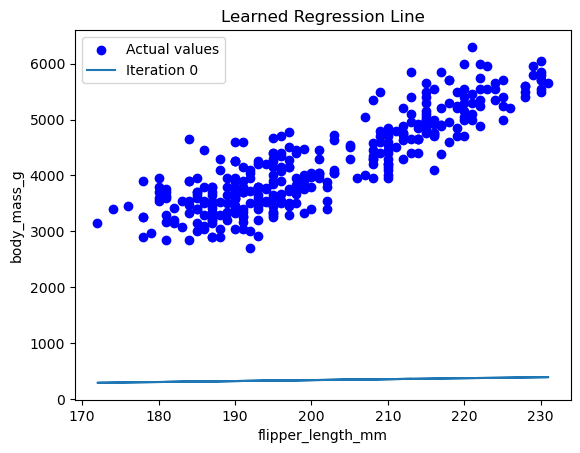

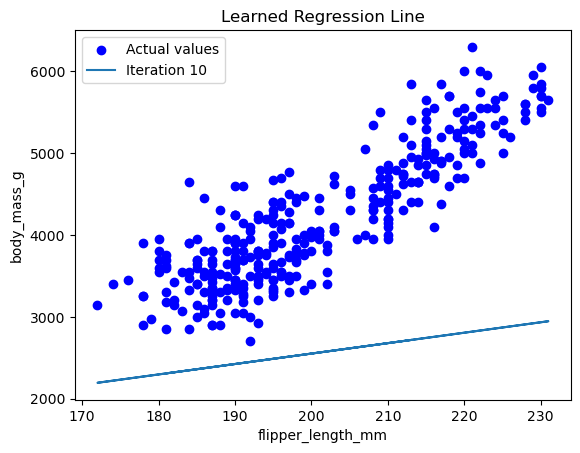

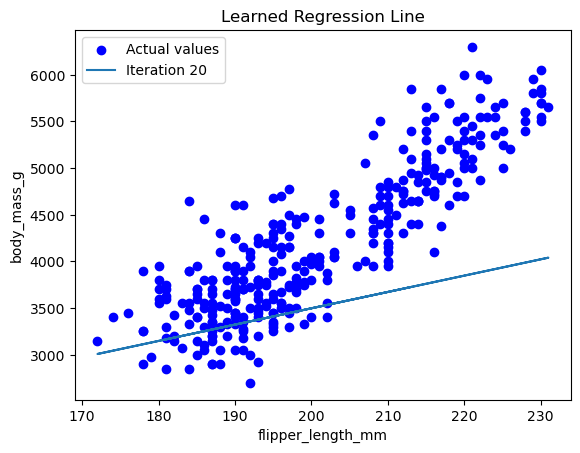

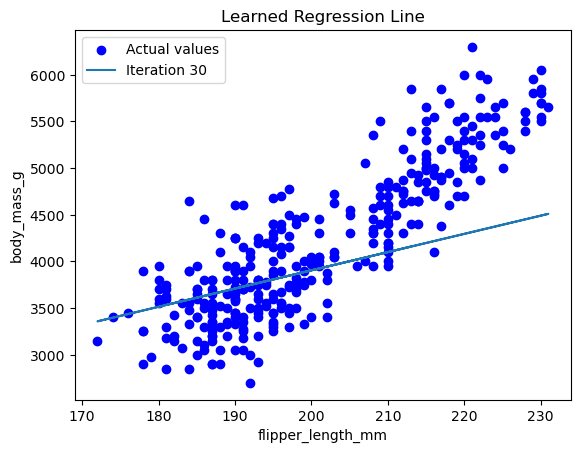

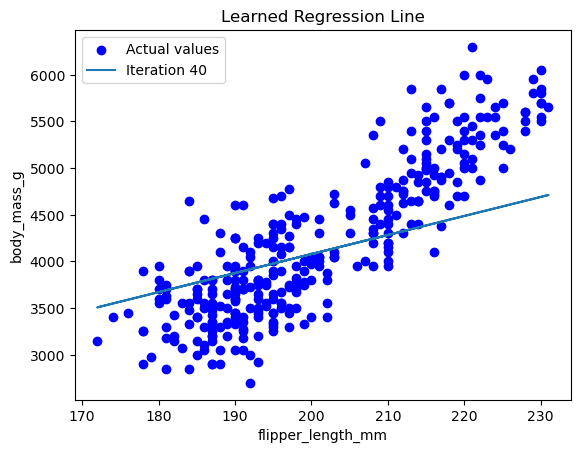

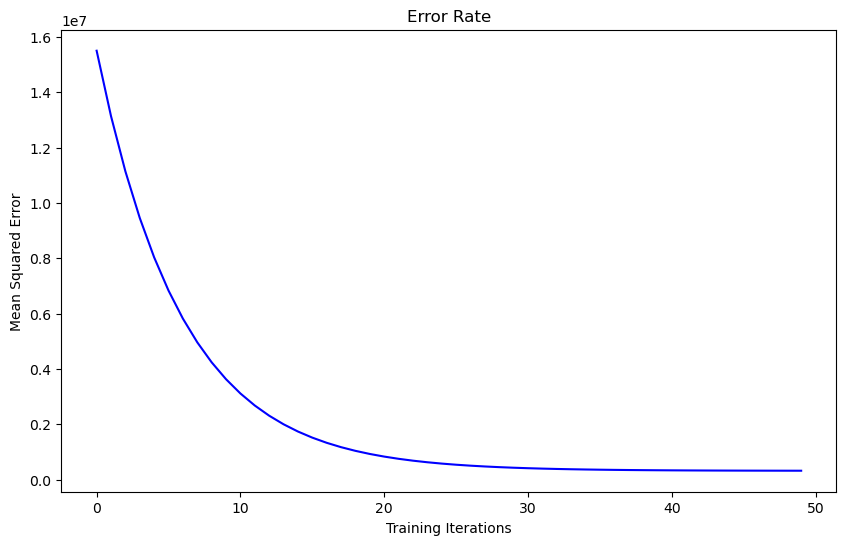

(20.746212517193175,
 0.0999469852854852,
 [15497049.983686196,
  13133843.417817397,
  11138536.53420811,
  9453855.38214142,
  8031442.314960717,
  6830467.916135562,
  5816459.018142879,
  4960309.173228545,
  4237443.172273866,
  3627111.629839237,
  3111795.38692008,
  2676702.635194144,
  2309344.3280476304,
  1999175.6908374669,
  1737293.5401813458,
  1516180.7240279105,
  1329490.3468301748,
  1171863.5861499265,
  1038775.871240441,
  926407.0082665903,
  831531.5241934791,
  751426.081738295,
  683791.3077933533,
  626685.7914575189,
  578470.3571335592,
  537761.0130879371,
  503389.22489290294,
  474368.37342657306,
  449865.43463030463,
  429177.0681097292,
  411709.42821871047,
  396961.1181168914,
  384508.7975084239,
  373995.03094166203,
  365118.0278633649,
  357622.9799225206,
  351294.74686690414,
  345951.6810858883,
  341440.4135371669,
  337631.45139087277,
  334415.4610244273,
  331700.12967396295,
  329407.51565811853,
  327471.8111141597,
  325837.4530272514,

In [108]:
cost_history = []
def train_and_visualize(x, y, m, c, learning_rate, iters):
    # Initialize the hyperparameters
    m_current, c_current = m, c
    
    for i in range(iters):
        # Update weights and bias using gradient descent
        m_current, c_current = update_weights(x, y, m_current, c_current, learning_rate)
        
        # Calculate cost for auditing purposes
        cost = cost_function(x, y, m_current, c_current)
        cost_history.append(cost)
        
        # Plot the line every 50 iterations
        if i % 10 == 0:
            y_predict = m_current * x + c_current
            plt.scatter(x, y, color='blue', label='Actual values')
            plt.plot(x, y_predict, label=f'Iteration {i}')
            plt.title('Learned Regression Line')
            plt.xlabel('flipper_length_mm')
            plt.ylabel('body_mass_g')
            plt.legend()
            plt.show()
            
    plt.figure(figsize=(10, 6))
    plt.plot(range(iters), cost_history, color='blue')
    plt.title('Error Rate')
    plt.xlabel('Training Iterations')
    plt.ylabel('Mean Squared Error')
    plt.show()

    
    return m_current, c_current, cost_history


m = 0
c = 0
learning_rate = 0.000001
iters = 50
train_and_visualize(x, y, m, c, learning_rate, iters)


# our model fitted better over the iterations

# MultiVariable Regression

if we have multiple independent variables and want to predict a certain variable, we can use multiple variable regression
lets write the code for this from scratch

In [4]:
data_penguin_ = pd.read_csv('Penguin/penguins_size.csv')

In [111]:
data_penguin_.head(5)

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [5]:
# remove rows with NaN values
data_subset_ = data_penguin_[['culmen_depth_mm','flipper_length_mm', 'body_mass_g']]
data_clean_ = data_subset_.dropna(subset = ['culmen_depth_mm','flipper_length_mm', 'body_mass_g'])
print(data_clean_.head(5))
print("\n")
print(len(data_clean_))

   culmen_depth_mm  flipper_length_mm  body_mass_g
0             18.7              181.0       3750.0
1             17.4              186.0       3800.0
2             18.0              195.0       3250.0
4             19.3              193.0       3450.0
5             20.6              190.0       3650.0


342


In [6]:
x0 = data_clean_['culmen_depth_mm']
x1 = data_clean_['flipper_length_mm']
y0 = data_clean_['body_mass_g']

# As the number of features grow, it becomes increasingly complex to visualise them. Hence, our solution is to break it down to 1-2 features and compare them at a time. Lets explore how the column depth and the flipper length impact the body mass

# Normalization

As the number of features grow, calculating gradient takes a longer time, especially if the datasets have high standard deviation. We can speed this up by "normalizing" our input data to ensure that they are all in the same range. Lets normalize our features in the range of -1 to 1

In [115]:
data_clean_.shape

(342, 3)

In [140]:
def normalize(features):
    
    for feature in features.T:
        print(feature)
        fmean = np.mean(feature)
        frange = np.max(feature) - np.min(feature)
        
        
        #Vector Subtraction
        feature -= fmean
        
        #Vector Division
        # Avoid division by zero
        feature = feature / frange
        
    return feature



In [141]:
normalize(data_clean_)
print(data_clean_.T)

0
1
2
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


C:\Users\durva\AppData\Local\Temp\ipykernel_17072\2556310552.py:14: RuntimeWarning: invalid value encountered in scalar divide
  feature = feature / frange


In [118]:
data_clean_

culmen_depth_mm  flipper_length_mm  body_mass_g
0               18.7              181.0       3750.0
1               17.4              186.0       3800.0
2               18.0              195.0       3250.0
4               19.3              193.0       3450.0
5               20.6              190.0       3650.0
..               ...                ...          ...
338             13.7              214.0       4925.0
340             14.3              215.0       4850.0
341             15.7              222.0       5750.0
342             14.8              212.0       5200.0
343             16.1              213.0       5400.0

[342 rows x 3 columns]

In [149]:

for feature in data_clean_.T:
    print(feature)
        


0
1
2
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [7]:
def normalize(df):
    result = df.copy()  # Make a copy of the DataFrame
    for feature_name in df.columns:
        mean_value = df[feature_name].mean()
        # Calculate the maximum absolute deviation from the mean
        max_abs_deviation = np.max(np.abs(df[feature_name] - mean_value))
        
        result[feature_name] = (df[feature_name] - mean_value) / max_abs_deviation
    return result

# Call the function and pass the DataFrame
standardized_data = normalize(data_clean_)



In [8]:
standardized_data

culmen_depth_mm  flipper_length_mm  body_mass_g
0           0.356149          -0.661969    -0.215301
1           0.057218          -0.495772    -0.191472
2           0.195186          -0.196618    -0.453595
4           0.494117          -0.263097    -0.358278
5           0.793048          -0.362815    -0.262960
..               ...                ...          ...
338        -0.793586           0.434931     0.344691
340        -0.655618           0.468170     0.308946
341        -0.333692           0.700846     0.737876
342        -0.540644           0.368452     0.475753
343        -0.241713           0.401691     0.571070

[342 rows x 3 columns]

## therefore we have now normalized the data from -1 to 1

# Making Predictions

Our predict function will output an estimate of body mass given our current weights (coefficients) and a culmen depth 	and flipper length. Our model will try to identify weight values that most reduce our cost function.

body mass = W_1 * culmen depth + W_2 * flipper length

In [17]:
def predict_(features, weights):
    predictions = np.dot(features, weights)
    return predictions

In [18]:
w1 = 0
w2 = 0

weights = np.array([[w1],[w2]])

In [19]:
weights.shape

(2, 1)

In [20]:
# performing dot product
x = standardized_data[['culmen_depth_mm' , 'flipper_length_mm']]
x.shape

print(predict_(x, weights))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

Like before we need a cost function

# Cost Function

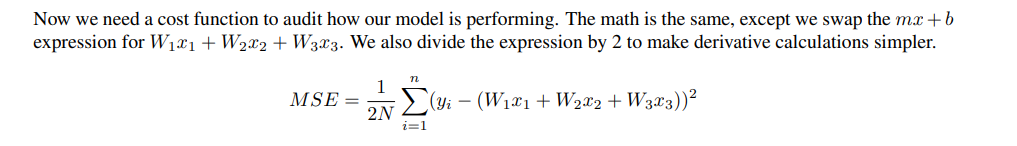

note that for us it is only two x variables

In [39]:
def cost_function_(features, targets, weights):
    n = len(targets)
    
    predictions = predict_(features, weights)
    
    #Lets do using matrix
    sq_error = (targets - predictions)**2
    
    return 1.0/(2*n) * sq_error.sum()
    
    

In [189]:
y = np.array(y0)
print(y.shape)
cost_function_(x, y, weights)

(342,)


3128614375.0

# Gradient descent

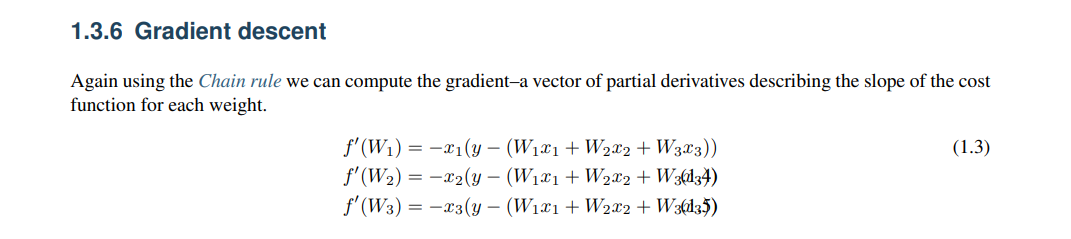

In [191]:
def update_weights_(features, targets, weights, learning_rate_):
    predictions = predict_(features, weights)
    
    #Extract our features
    x1 = features[:,0]
    x2 = features[:,1]
    
    d_w1 = -x1.dot(targets - predictions)
    d_w2 = -x2.dot(targets - predictions)
    
    #Multiply the mean derivative by the learning rate and subtract from our weights 
    weights[0][0] -= (learning_rate_ * np.mean(d_w1))
    weights[1][0] -= (learning_rate_ * np.mean(d_w2))
    
    return weights

# Vectorized gradient descent

We use the same formula as above, but instead of operating on a single feature at a time, we use matrix multiplication
to operative on all features and weights simultaneously. We replace the 𝑥𝑖
terms with a single feature matrix 𝑋

In [68]:
x = standardized_data[['culmen_depth_mm' , 'flipper_length_mm']]
y = standardized_data['body_mass_g']

In [69]:
# convert them to arrays
x_ = x.to_numpy()
y_ = y.to_numpy()


In [30]:
x_

array([[ 0.35614873, -0.66196909],
       [ 0.05721778, -0.49577218],
       [ 0.19518591, -0.19661775],
       [ 0.49411686, -0.26309651],
       [ 0.7930478 , -0.36281466],
       [ 0.14919653, -0.66196909],
       [ 0.56310092, -0.19661775],
       [ 0.2181806 , -0.26309651],
       [ 0.70106905, -0.36281466],
       [-0.01176629, -0.49577218],
       [ 0.03422309, -0.69520848],
       [ 0.10320715, -0.62872971],
       [ 0.93101593, -0.32957527],
       [ 0.90802125, -0.0968996 ],
       [ 0.14919653, -0.52901157],
       [ 0.42513279, -0.19661775],
       [ 0.81604249, -0.13013898],
       [ 0.28716466, -0.56225095],
       [ 1.        , -0.22985713],
       [ 0.26416997, -0.89464477],
       [ 0.35614873, -0.69520848],
       [ 0.47112217, -0.39605404],
       [ 0.2181806 , -0.52901157],
       [ 0.0112284 , -0.69520848],
       [ 0.4021381 , -0.4625328 ],
       [ 0.33315404, -0.59549033],
       [ 0.17219122, -0.4625328 ],
       [ 0.33315404, -0.96112353],
       [ 0.4021381 ,

In [31]:
x_.shape

(342, 2)

In [32]:
y_



array([-2.15301003e-01, -1.91471572e-01, -4.53595318e-01, -3.58277592e-01,
       -2.62959866e-01, -2.74874582e-01,  2.25543478e-01, -3.46362876e-01,
        2.29933110e-02, -4.29765886e-01, -2.39130435e-01, -4.77424749e-01,
       -1.91471572e-01,  9.44816054e-02, -2.39130435e-01, -3.58277592e-01,
        1.42140468e-01, -4.17851171e-01, -8.36120401e-04, -3.82107023e-01,
       -2.86789298e-01, -1.91471572e-01, -1.19983278e-01, -1.91471572e-01,
       -1.91471572e-01, -3.10618729e-01, -4.77424749e-01, -5.01254181e-01,
       -1.19983278e-01, -4.53595318e-01, -1.43812709e-01, -4.29765886e-01,
       -1.43812709e-01, -4.17851171e-01, -2.46655518e-02, -1.19983278e-01,
       -3.10618729e-01, -4.29765886e-01,  2.13628763e-01, -5.01254181e-01,
       -1.43812709e-01, -5.25083612e-01,  9.44816054e-02, -5.72742475e-01,
        1.89799331e-01, -3.70192308e-01, -5.84657191e-01, -3.58277592e-01,
       -2.46655518e-02, -3.34448161e-01,  4.68227425e-02, -3.58277592e-01,
       -7.23244147e-02, -

In [33]:
y_.shape

(342,)

In [36]:
def update_weights_vectorized(X, targets, weights, learning_rate):
    n = len(X)
    
    #Get Predictions
    predictions = predict_(X, weights)
    
    #Calculate error/loss
    error = targets - predictions
    
    gradient = np.dot(-X.T, error)
    
    #Take the average error derivative for each feature
    gradient /= n
    
    #Multiply the gradient by our learning rate
    gradient *= learning_rate

    #Subtract from our weights to minimize cost
    weights -= gradient
    
    return weights

# Bias

Our train function is the same as for simple linear regression, however we’re going to make one final tweak before
running: add a bias term to our feature matrix.
In our example, it’s very unlikely that body mass would be 0. 

In [65]:
bias = np.ones(shape = (len(x_), 1))

In [66]:
x_ = np.append(bias, x_, axis=1)

# Train

lets now train our data

Iteration 0: Cost 0.07251876889208567
Iteration 100: Cost 0.04980358247008627
Iteration 200: Cost 0.03751623619371523
Iteration 300: Cost 0.030665256187655747
Iteration 400: Cost 0.02668359801340235
Iteration 500: Cost 0.024245262432903168
Iteration 600: Cost 0.022660474991682795
Iteration 700: Cost 0.021566413215253467
Iteration 800: Cost 0.020768933010614624
Iteration 900: Cost 0.020161463268176614


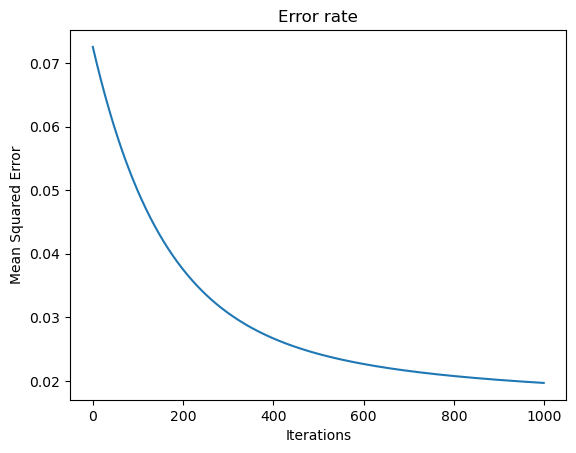

In [52]:
def train_and_plot(X, targets, learning_rate, iterations):
    weights = np.zeros(X.shape[1])  # Initialize weights to zero or a small random number
    cost_history = []  # To record the cost at each iteration

    for i in range(iterations):
        weights = update_weights_vectorized(X, targets, weights, learning_rate)
        cost = cost_function_(X, targets, weights)
        cost_history.append(cost)

        # Display cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    # Plotting the cost history
    plt.plot(cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title('Error rate')
    plt.show()

    return weights


learning_rate = 0.01
iterations = 1000

trained_weights = train_and_plot(x_, y_, learning_rate, iterations)


# Let's visualise the fitting of line in a 3-dimensional space 

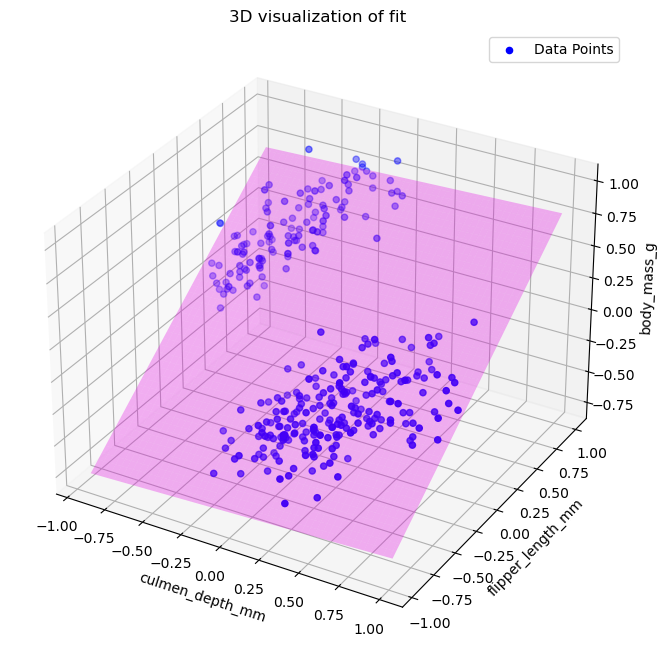

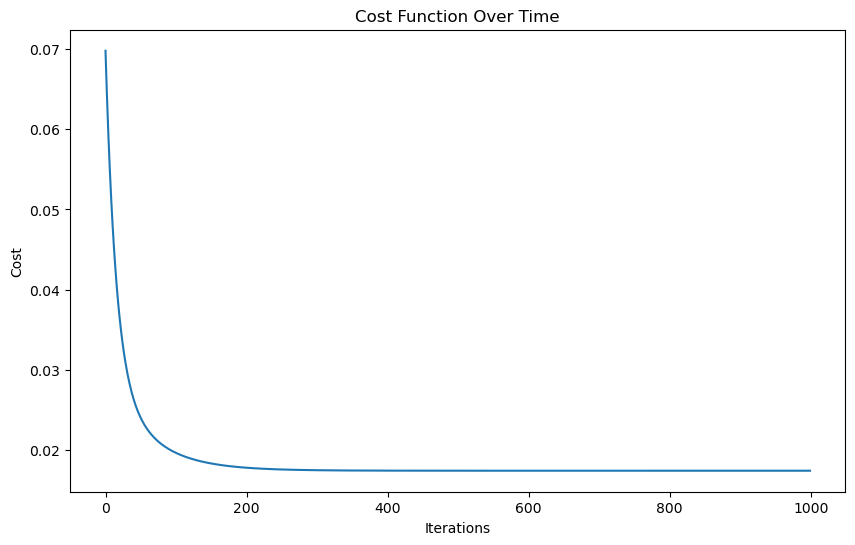

In [70]:
from mpl_toolkits.mplot3d import Axes3D

def train_and_visualize_3D(X, targets, learning_rate, iterations):
    weights = np.zeros(X.shape[1])
    cost_history = []
    
    # Train the model
    for i in range(iterations):
        weights = update_weights_vectorized(X, targets, weights, learning_rate)
        cost = cost_function_(X, targets, weights)
        cost_history.append(cost)
    
    # Plotting
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create grid to evaluate model
    x_surf = np.linspace(X[:,0].min(), X[:,0].max(), 100) # for culmen_depth_mm
    y_surf = np.linspace(X[:,1].min(), X[:,1].max(), 100) # for flipper_length_mm
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)
    X_surf = np.c_[x_surf.ravel(), y_surf.ravel()] 
    
    # Predicting values
    pred_surf = predict_(X_surf, weights).reshape(x_surf.shape)

    # Plotting the surface plot
    ax.plot_surface(x_surf, y_surf, pred_surf, color='magenta', alpha=0.3)
    
    # Scatter plot of actual data
    ax.scatter(X[:, 0], X[:, 1], targets, color='blue', label='Data Points')
    
    ax.set_xlabel('culmen_depth_mm')
    ax.set_ylabel('flipper_length_mm')
    ax.set_zlabel('body_mass_g')
    ax.set_title('3D visualization of fit')
    ax.legend()
    
    plt.show()
    
    # Plot the cost history
    plt.figure(figsize=(10, 6))
    plt.plot(cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function Over Time')
    plt.show()
    
    return weights

# Usage example with your data:
# Let's say standardized_data is your data matrix including the features and target.


learning_rate = 0.1
iterations = 1000

trained_weights = train_and_visualize_3D(x_, y_, learning_rate, iterations)


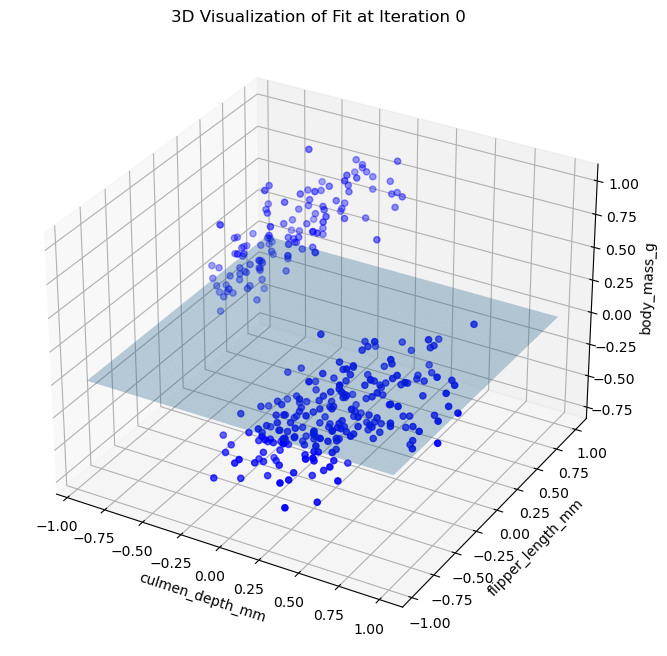

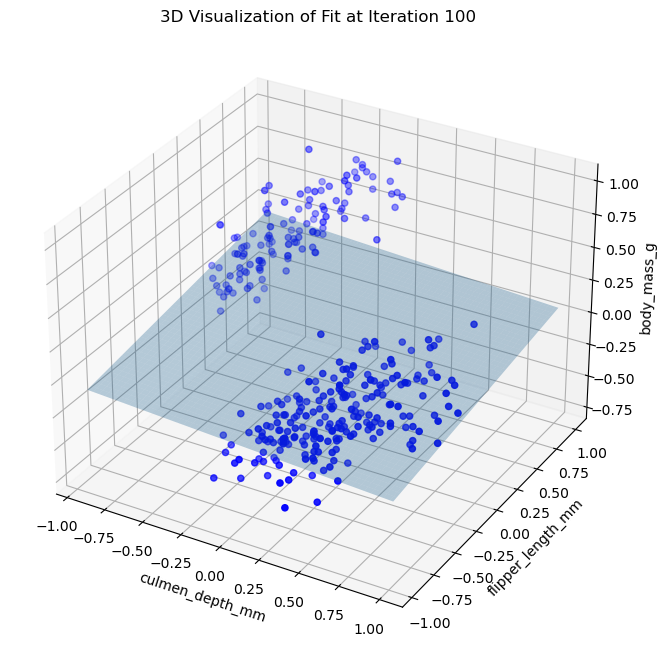

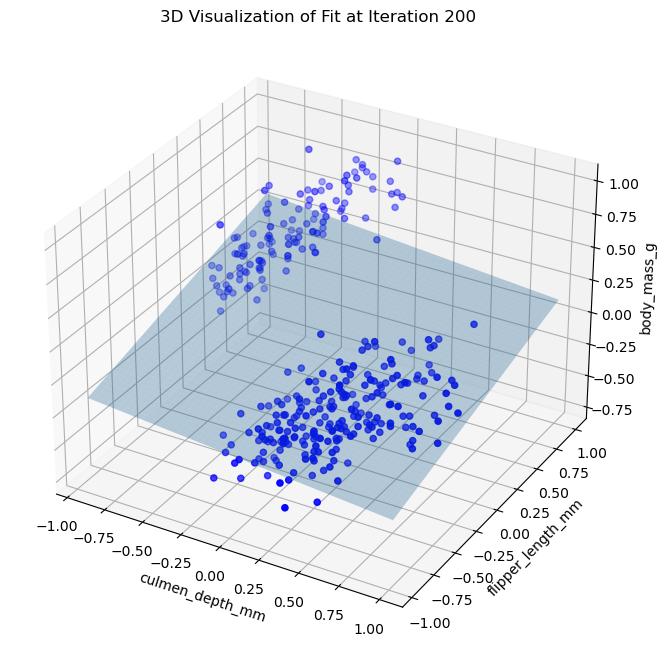

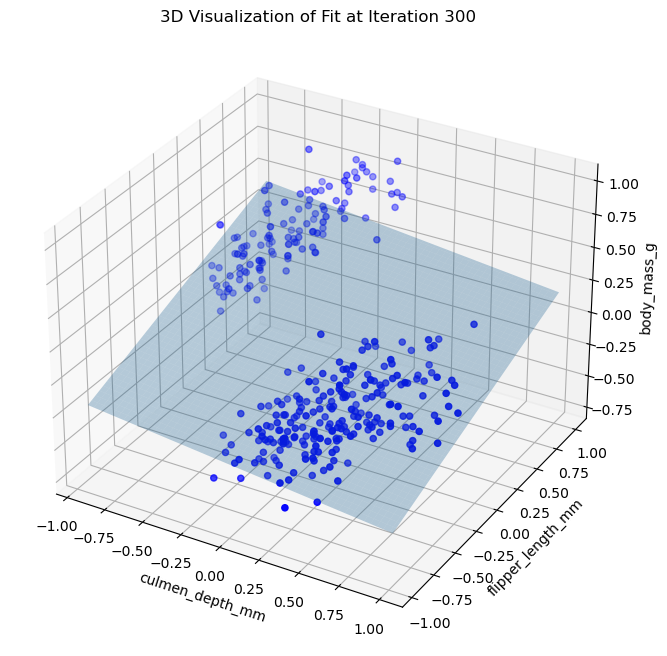

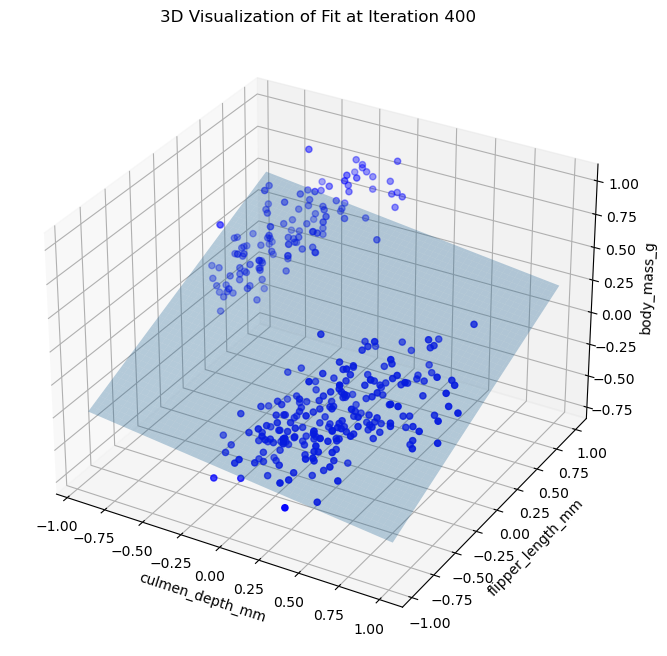

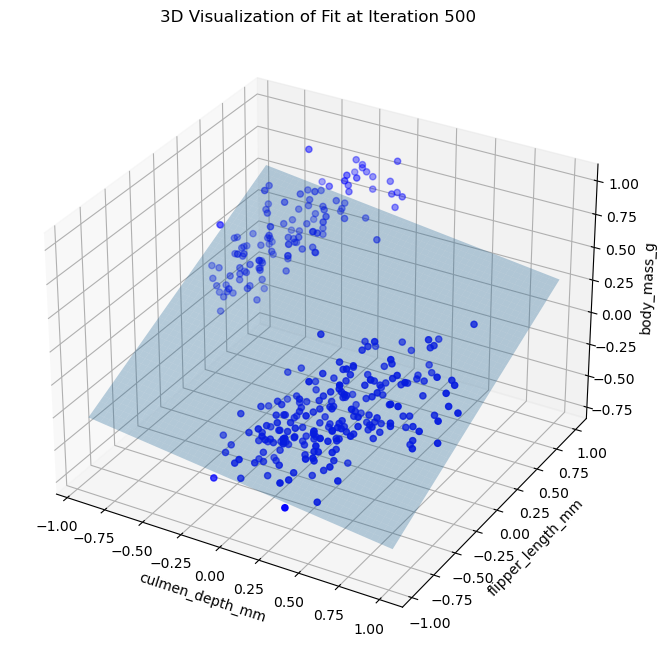

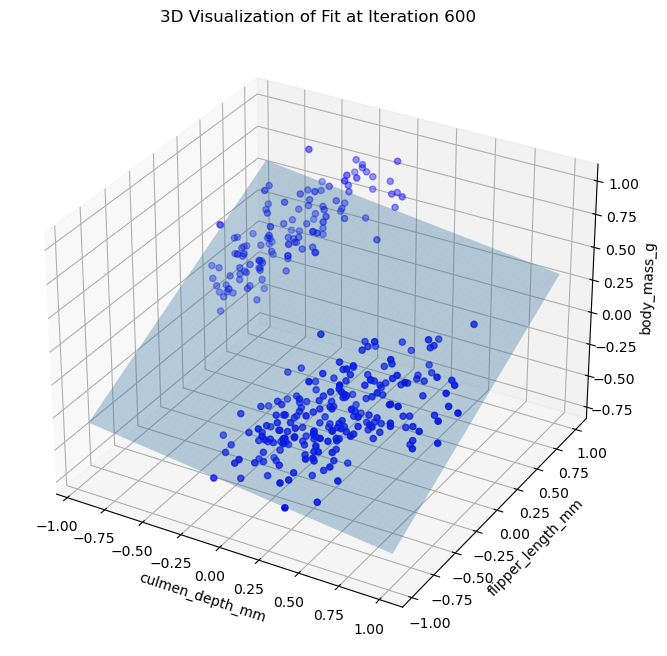

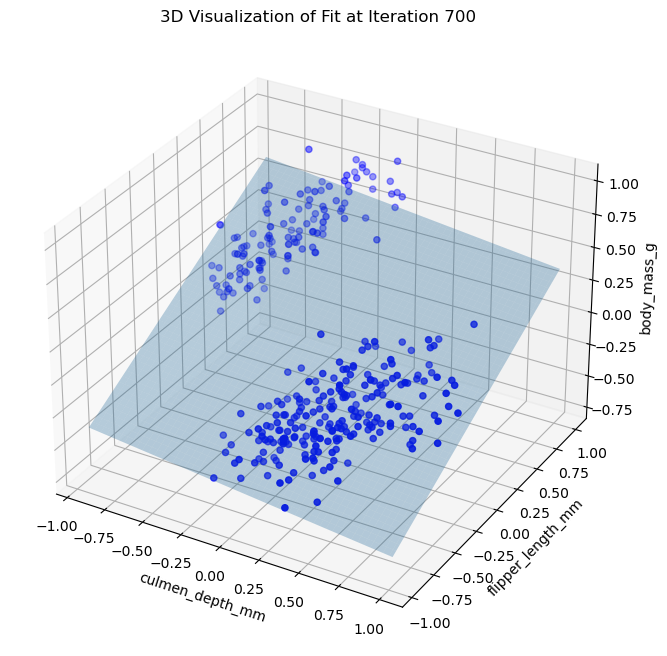

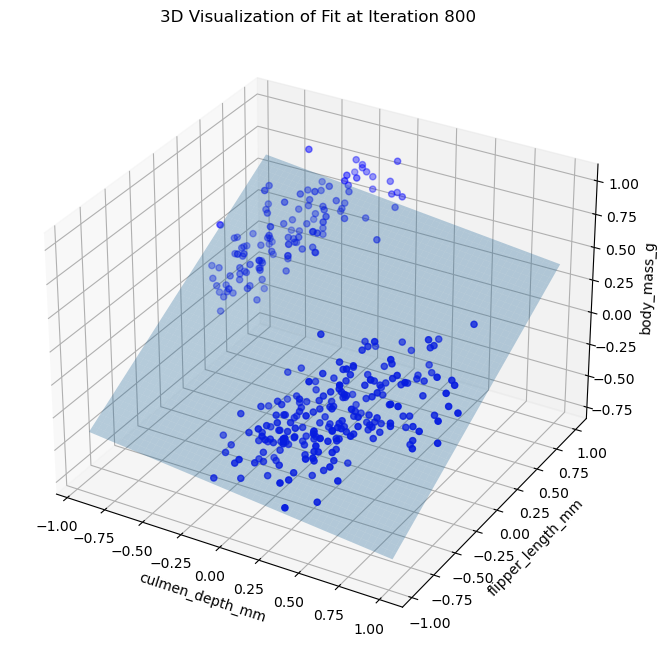

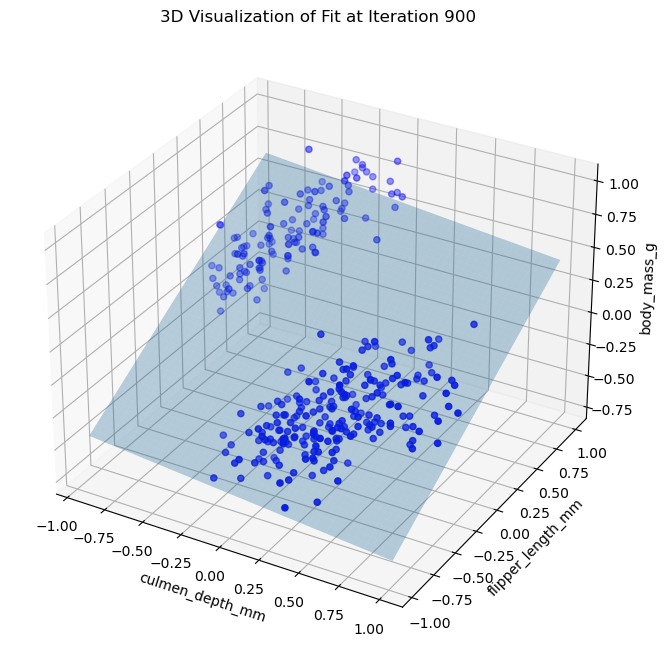

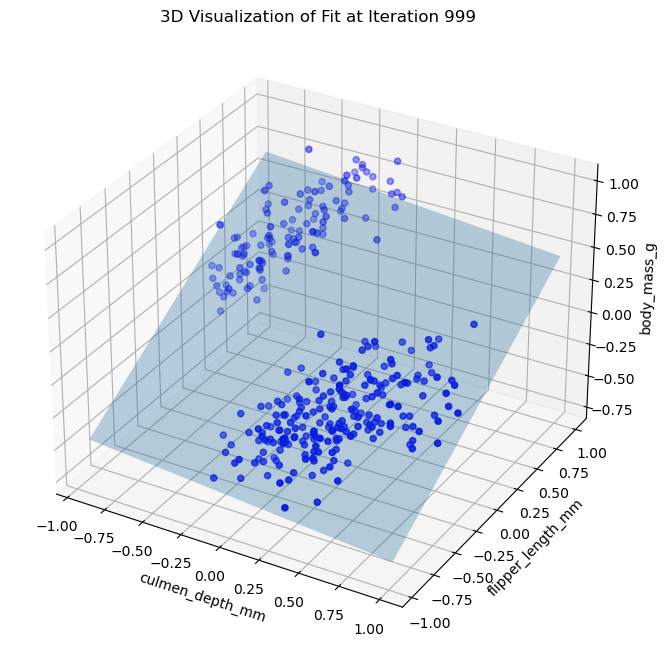

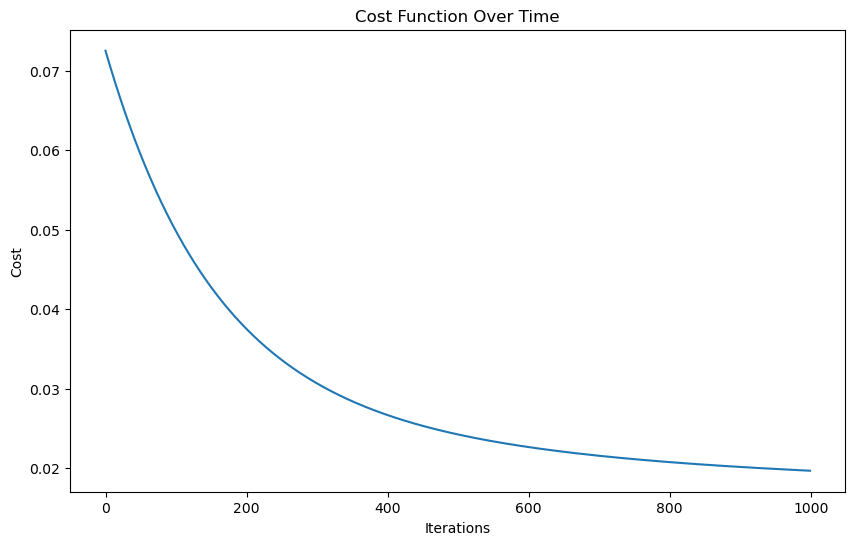

In [74]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def train_and_visualize_3D(X, targets, learning_rate, iterations, plot_every_n=100):
    weights = np.zeros(X.shape[1])
    cost_history = []

    # Create grid to evaluate model
    x_surf = np.linspace(X[:,0].min(), X[:,0].max(), 100)  # for culmen_depth_mm
    y_surf = np.linspace(X[:,1].min(), X[:,1].max(), 100)  # for flipper_length_mm
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)
    X_surf = np.c_[x_surf.ravel(), y_surf.ravel()]  # add bias term
    
    # Train the model and plot the surface at intervals
    for i in range(iterations):
        weights = update_weights_vectorized(X, targets, weights, learning_rate)
        cost = cost_function_(X, targets, weights)
        cost_history.append(cost)

        # Plot the prediction surface at intervals
        if i % plot_every_n == 0 or i == iterations - 1:
            fig = plt.figure(figsize=(12, 8))
            ax = fig.add_subplot(111, projection='3d')
            
            # Scatter plot of actual data
            ax.scatter(X[:, 0], X[:, 1], targets, color='blue', label='Data Points')

            # Plotting the surface plot
            pred_surf = predict_(X_surf, weights).reshape(x_surf.shape)
            ax.plot_surface(x_surf, y_surf, pred_surf, alpha=0.3)

            ax.set_xlabel('culmen_depth_mm')
            ax.set_ylabel('flipper_length_mm')
            ax.set_zlabel('body_mass_g')
            ax.set_title(f'3D Visualization of Fit at Iteration {i}')
            plt.show()

    # Plot the cost history in a separate plot
    plt.figure(figsize=(10, 6))
    plt.plot(cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function Over Time')
    plt.show()
    
    return weights

# Usage example
learning_rate = 0.01
iterations = 1000
trained_weights = train_and_visualize_3D(x_, y_, learning_rate, iterations)


# our model fitted better over the iterations